# Customer Churn Prediction

In [1]:
# loading packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
import tkinter as tk


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Collection & Processing

In [4]:
# loading the data from csv file to a Pandas DataFrame
data=pd.read_csv("Churn_Modelling.csv")

# Features of dataset

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# print the first 5 rows of the dataframe
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# print the last 5 rows of the dataframe
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
data.shape

(10000, 14)

In [9]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 10000
Number of columns: 14


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# checking for missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Analysis


In [12]:
# get some statistical measures about the data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Getting correlation
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [14]:
# Getting some informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
data.duplicated().sum()  # To check duplicate values.


0

In [16]:
data.Exited.unique() # To Check unique values.


array([1, 0], dtype=int64)

In [17]:
data['Exited'].value_counts() # To show the count of unique values of the column 'churn'


0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
data['CustomerId'].value_counts() # To check unique values.


15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [19]:
data['IsActiveMember'].value_counts() # To check unique values.


1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [20]:
data['CreditScore'].value_counts() # To check unique values.


850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

# Data Visualization

In [21]:
import seaborn as sns 
from matplotlib import rcParams

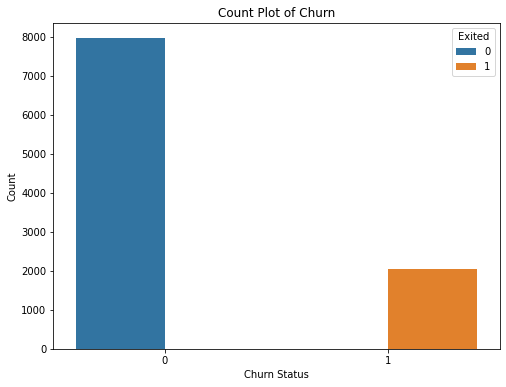

In [22]:
plt.figure(figsize=(8, 6))

# Create a countplot with hue for the 'Churn' column
sns.countplot(data=data, x='Exited', hue='Exited')

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Count Plot of Churn')

# Show the plot
plt.show()

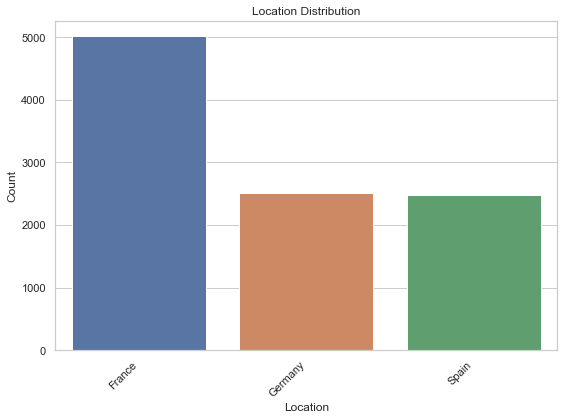

In [23]:
# Create a count plot for the 'Location' column
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Geography', order=data['Geography'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')


# Show the plot
plt.tight_layout()
plt.show()

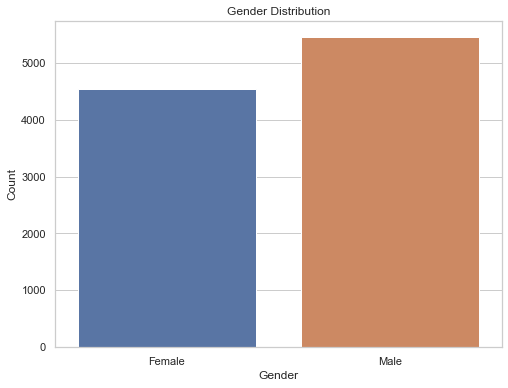

In [24]:
# Create a count plot for the 'Gender' column
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

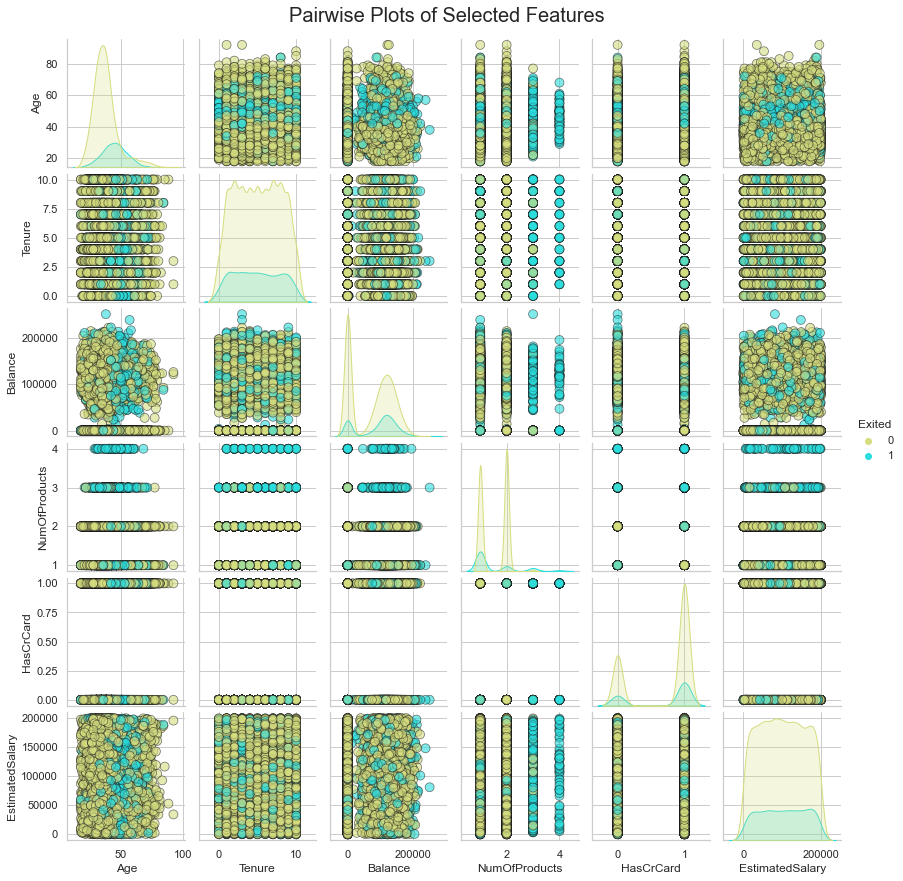

In [25]:
# Setting the aesthetics for the plot
sns.set_style("whitegrid")

# Create an enhanced pairplot with hue for 'Exited'
sns.pairplot(data[['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'Exited','EstimatedSalary']], 
             diag_kind='kde', 
             hue='Exited',
             palette="rainbow_r",  # Choose a color palette that distinguishes between 0 and 1
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, 
             height=2)

# Set the title for the plot
plt.suptitle('Pairwise Plots of Selected Features', size=20, y=1.02)
plt.show()

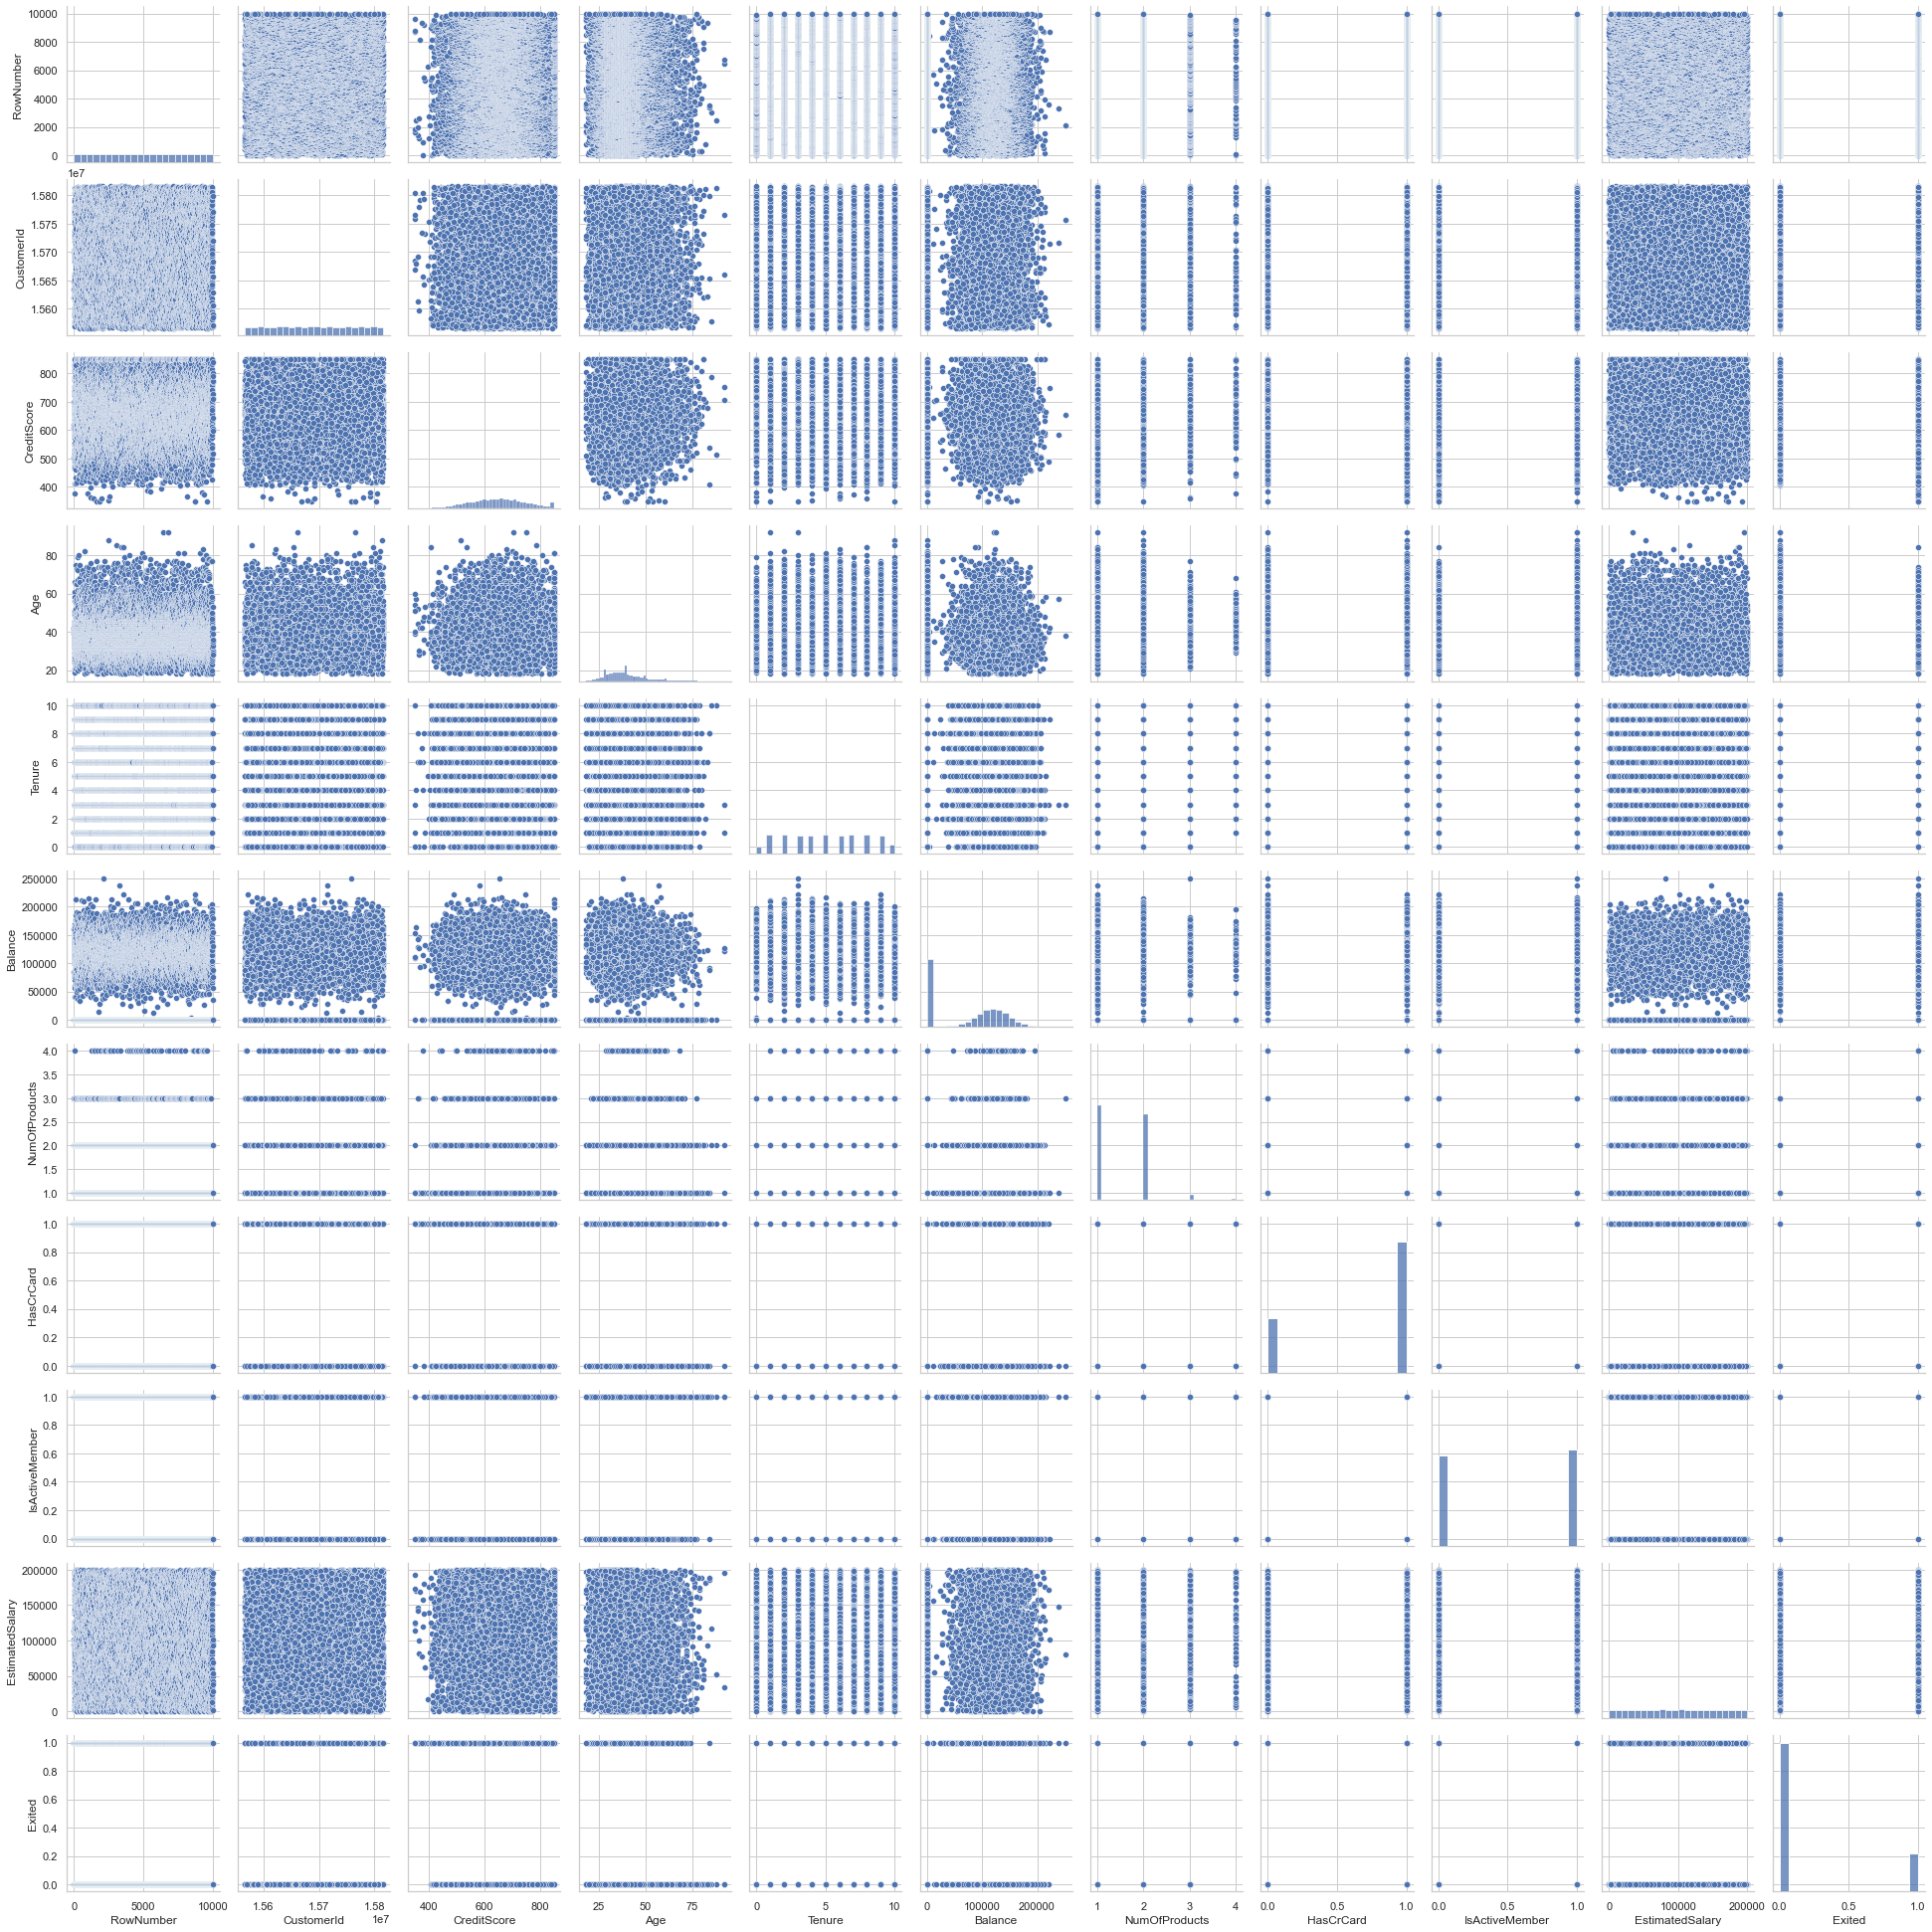

In [26]:
#visualization
sns.pairplot(data)
plt.show()

In [27]:
correlation = data.corr()

<AxesSubplot:>

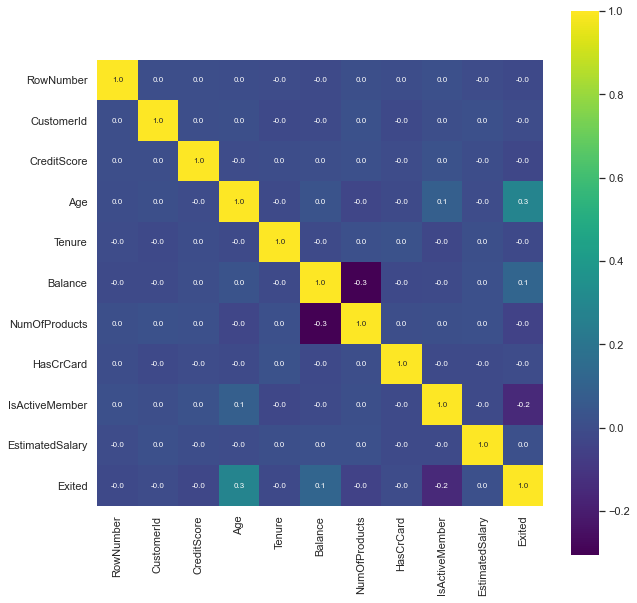

In [28]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='viridis')


In [29]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['Surname']=enc.fit_transform(data['Surname'])
data['Geography']=enc.fit_transform(data['Geography'])
data['Gender']=enc.fit_transform(data['Gender'])

# Model selection

In [30]:
X = data.drop('Exited',axis = 1)
Y = data['Exited']
print(X)
print('-----------------------------------------------------------------------')
print(Y)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

# Splitting the data into training data and Test data

In [31]:
xtr,xte,ytr,yte=train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, xtr.shape, xte.shape)

(10000, 13) (8000, 13) (2000, 13)


In [33]:
# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model_li=LinearRegression()

In [36]:
# Fitting the model

In [37]:
model_li.fit(xtr,ytr)

LinearRegression()

In [38]:
ypr=model_li.predict(xte)


In [39]:
# Using r2_score for finding accuracy

In [40]:
from sklearn.metrics import r2_score

In [41]:
lr=r2_score(yte,ypr)*100
lr

11.951684996946966

In [42]:
# Support Vector Machine - Support Vector Regressor

In [43]:
from sklearn.svm import SVR
m1=SVR()
m1.fit(xtr,ytr)

SVR()

In [44]:
y1=m1.predict(xte)
sv=r2_score(yte,y1)*100
sv

-5.406893142022384

In [45]:
# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
m2=DecisionTreeRegressor()

In [48]:
xtr,xte,ytr,yte=train_test_split(X,Y)

In [49]:
m2.fit(xtr,ytr)
ypr=m2.predict(xte)


In [50]:
from sklearn.metrics import r2_score
dt=r2_score(yte,ypr)*100
dt

-33.05055721473511

In [51]:
# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
m3=RandomForestRegressor()

In [54]:
m3.fit(xtr,ytr)

RandomForestRegressor()

In [55]:
ypr3=m3.predict(xte)

In [56]:
rf=r2_score(yte,ypr3)*100
rf

31.447709882885565

In [57]:
import matplotlib.pyplot as plt

In [58]:
models=['LinearRegression','SVR','DecisionTreeRegressor','RandomForestRegressor']
data=[lr,sv,dt,rf]
cols=['accuracy_score']
compare=pd.DataFrame(data=data,index=models,columns=cols)
compare.sort_values(ascending=False,by=['accuracy_score'])

,accuracy_score
RandomForestRegressor,31.447710
LinearRegression,11.951685
SVR,-5.406893
DecisionTreeRegressor,-33.050557


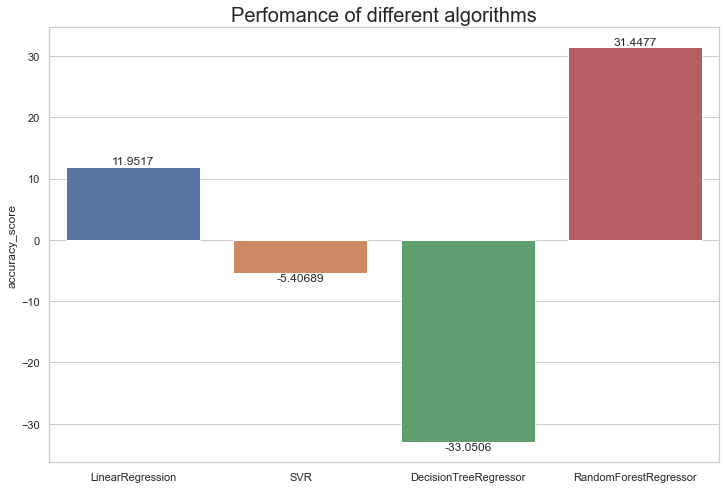

In [59]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=models,y="accuracy_score",data=compare,palette=None)
ax.bar_label(ax.containers[0])
plt.title('Perfomance of different algorithms',fontsize=20)
plt.show()

In [60]:
print('Accuracy of Linear Regression is :',lr)
print('Accuracy of SVR is : ',sv)
print('Accuracy of DecisionTreeRegressor is : ',dt)
print('Accuracy of RandomForestRegressor is : ',rf)

Accuracy of Linear Regression is : 11.951684996946966
Accuracy of SVR is :  -5.406893142022384
Accuracy of DecisionTreeRegressor is :  -33.05055721473511
Accuracy of RandomForestRegressor is :  31.447709882885565


# Conclusion:

# Among all the algorithms, we can conclude that linear regression is the best algorithm as it has highest accuracy.

# Evaluation

Mean Absolute Error

In [61]:
mae = metrics.mean_absolute_error(yte, ypr3)

In [62]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  0.21815200000000004


# k fold cross-validation

In [63]:
# Loading packages:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# User Input:

In [64]:
reg = LinearRegression()
k = 4
cv_result = cross_val_score(reg,X,Y,cv=k) # uses R^2 as score 
print('Accuracy score for each folds: ',cv_result)
print('overall accuracy: ',np.sum(cv_result)/k)

Accuracy score for each folds:  [0.1543061  0.12275785 0.14513664 0.11301128]
overall accuracy:  0.13380296979581832


In [65]:
reg1 = SVR()
k = 4
cv_result = cross_val_score(reg1,X,Y,cv=k) # uses R^2 as score 
print('Accuracy score for each folds: ',cv_result)
print('overall accuracy: ',np.sum(cv_result)/k)

Accuracy score for each folds:  [-0.07508314 -0.06911384 -0.06248693 -0.05888119]
overall accuracy:  -0.06639127478288931


In [66]:
reg2 = DecisionTreeRegressor()
k = 4
cv_result = cross_val_score(reg2,X,Y,cv=k) # uses R^2 as score 
print('Accuracy score for each folds: ',cv_result)
print('overall accuracy: ',np.sum(cv_result)/k)

Accuracy score for each folds:  [-0.34086773 -0.33334115 -0.2925     -0.59161573]
overall accuracy:  -0.38958115350907585


In [67]:
reg4 = RandomForestRegressor()
k = 4
cv_result = cross_val_score(reg4,X,Y,cv=k) # uses R^2 as score 
print('Accuracy score for each folds: ',cv_result)
print('overall accuracy: ',np.sum(cv_result)/k)

Accuracy score for each folds:  [0.2596339  0.34525038 0.32631975 0.25148796]
overall accuracy:  0.29567299456788804


Deep Learning

In [68]:
import tensorflow as tf
from tensorflow import keras

In [71]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xtr)
X_test = sc.transform(xte)

In [72]:
X_train.shape


(7500, 13)

In [73]:
## Part 2 Now lets create ANN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [74]:
# Let's initialize the ANN
classifier = Sequential()

In [75]:
## Adding the input Layer
classifier.add(Dense(units = 11,activation = 'relu'))

In [76]:
## Adding First Input Layer.
classifier.add(Dense(units = 7,activation = 'relu'))

In [77]:
## Adding the Second hidden layer.
classifier.add(Dense(units = 6,activation = 'relu'))

In [78]:
## Adding the second hidden layer.
classifier.add(Dense(1,activation = 'sigmoid'))

In [79]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [80]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [81]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)


In [91]:
model_history = classifier.fit(xtr,ytr,validation_split = 0.33,batch_size=10,epochs = 1000,callbacks = early_stopping)


Epoch 1/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4920 - val_accuracy: 0.8065
Epoch 2/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4921 - val_accuracy: 0.8065
Epoch 3/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4921 - val_accuracy: 0.8065
Epoch 4/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4922 - val_accuracy: 0.8065
Epoch 5/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4919 - val_accuracy: 0.8065
Epoch 6/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7896 - val_loss: 0.4922 - val_accuracy: 0.8065
Epoch 7/1000
503/503 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.7896 - val_loss: 0.4917 - val_accuracy:

In [92]:
# Deploy the model using `pickle` module
import pickle

pickle.dump(rf, open("model.pkl", 'wb')) 